In [1]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input,Conv2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Model

In [4]:
# load data

fashion_mnist= tf.keras.datasets.fashion_mnist

In [6]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

x_train,x_test=x_train/255.0, x_test/255.0

4423680/4422102 [==============================] - 3s 1us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
#data is only 2d
#conv expects height x weight x color

x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test, -1)

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
#finding number of classes
#set finds the unique number of classes

K= len(set(y_train))

In [16]:
K

10

In [17]:
# build model

i= Input(shape=x_train[0].shape)
x= Conv2D(32, (3,3), strides=1, activation='relu', padding='same')(i)
x= Conv2D(64, (3,3), strides=2, activation='relu')(x)
x= Conv2D(128, (3,3), strides=2, activation='relu')(x)
x= Flatten()(x)
x= Dropout(0.2)(x)
x= Dense(512, activation='relu')(x)
x= Dropout(0.2)(x)
x= Dense(K, activation='softmax')(x)

model=Model(i,x)

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
r= model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 150s 2ms/sample - loss: 0.3949 - accuracy: 0.8564 - val_loss: 0.2957 - val_accuracy: 0.8905
Epoch 2/15
60000/60000 [==============================] - 146s 2ms/sample - loss: 0.2578 - accuracy: 0.9056 - val_loss: 0.2535 - val_accuracy: 0.9082
Epoch 3/15
60000/60000 [==============================] - 146s 2ms/sample - loss: 0.2073 - accuracy: 0.9222 - val_loss: 0.2457 - val_accuracy: 0.9125
Epoch 4/15
60000/60000 [==============================] - 146s 2ms/sample - loss: 0.1731 - accuracy: 0.9351 - val_loss: 0.2384 - val_accuracy: 0.9150
Epoch 5/15
60000/60000 [==============================] - 146s 2ms/sample - loss: 0.1418 - accuracy: 0.9464 - val_loss: 0.2284 - val_accuracy: 0.9213
Epoch 6/15
60000/60000 [==============================] - 145s 2ms/sample - loss: 0.1163 - accuracy: 0.9567 - val_loss: 0.2512 - val_accuracy: 0.9133
Epoch 7/15
60000/60000 [==========================

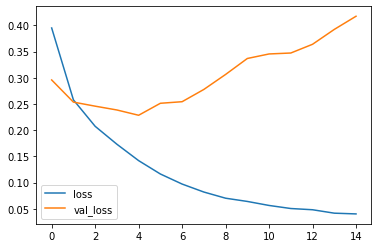

In [21]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

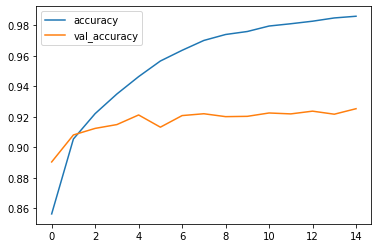

In [22]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [23]:
from sklearn.metrics import confusion_matrix

In [25]:
from mlxtend.plotting import plot_confusion_matrix

In [31]:
P= model.predict(x_test).argmax(axis=1)

In [32]:
P

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [33]:
matrix = confusion_matrix (y_test, P)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x231db104248>)

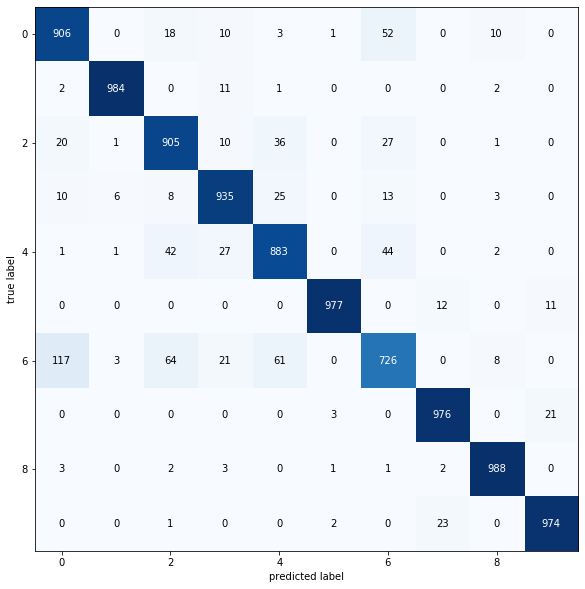

In [34]:
plot_confusion_matrix(matrix, figsize=(10,10))

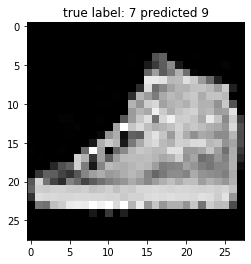

In [36]:
# show some misclassified examples
# numpy where function return the index of values

misclassified = np.where(P != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title('true label: %s predicted %s' %(y_test[i], P[i]));

#Python supports formatting values into strings. Although this can include very complicated expressions,
#the most basic usage is to insert values into a string with the %s placeholder.
#The %s token allows me to insert (and potentially format) a string. 
#Notice that the %s token is replaced by whatever I pass to the string after the % symbol